In [14]:
import constants
import numpy as np
import matplotlib.pyplot as plt

from helpers import rk4
from helpers import ODEs_nineboxes
from emissions import emissions
from emissions import modified_emissions

### **Calling/Plotting RK4 & Euler Integrations** ###

In [15]:
# define which emissions scheme we will begin with
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True

# define our time range
xinitial = 1800
xfinal =   2200

# define our sample size
n=3000

STEP SIZE: 0.13333333333333333
RK4 Time Elapsed: 1.607 seconds


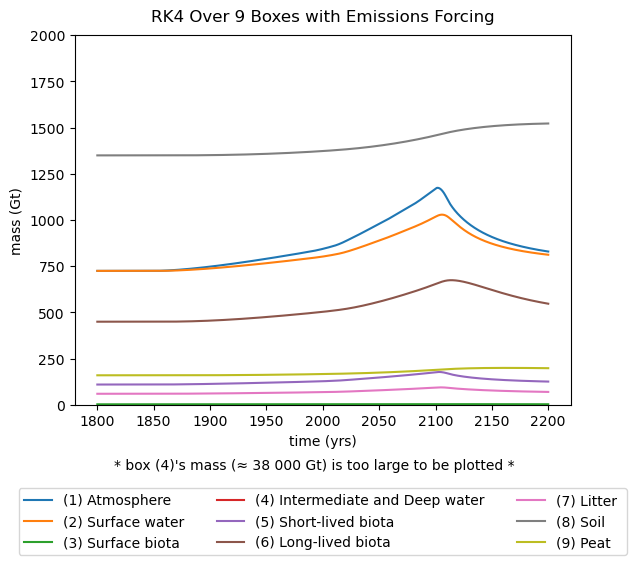

In [16]:
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

# plot rk4 integration over our time period for all 9 boxes... 
# but chop/truncate y-axis range since box 4's mass is humongous
plt.plot(rungekutta_nine[0],rungekutta_nine[1])
plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)')
plt.title(f'RK4 Over 9 Boxes with Emissions Forcing',pad=10)
plt.legend(constants.ninebox_legend_arr, bbox_to_anchor=[0.5,-0.425], loc='lower center', ncol=3)
plt.figtext(x=0.5,y=-0.025, s='* box (4)\'s mass (\u2248 38 000 Gt) is too large to be plotted *',ha='center')

plt.ylim(0,2000)

plt.show()

In [17]:
# get time values and masses from previous integration
masses_nine = rungekutta_nine[1]
time_nine = rungekutta_nine[0]

# initialize arrays for atmosphere and surface ocean mass evolution
atm_arr_nine = []
surfaceocean_arr_nine = []

# fill atmosphere and surface ocean mass arrays for later use
for i in range(len(masses_nine)):
    atm_arr_nine.append(masses_nine[i][0])
    surfaceocean_arr_nine.append(masses_nine[i][1])    

In [18]:
# specify which emissions we will proceed with
constants.FORCING = False
constants.MODIFIED_EMISSIONS = True

# perform rk4 integration on our nine-box model, this time with modified emissions
rungekutta_modified_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=2200, y0=constants.Mi0_nineboxes, N=5000)

# get time values and masses from recent integration with modified emissions
masses_modified_nine = rungekutta_modified_nine[1]
time_modified_nine = rungekutta_modified_nine[0]

# initialize arrays for atmosphere and surface ocean mass evolution with modified emissions forcing
atm_arr_modified_nine = []
surfaceocean_arr_modified_nine = []

# fill modified emissions atmosphere and surface ocean mass arrays for later use
for i in range(len(masses_modified_nine)):
    atm_arr_modified_nine.append(masses_modified_nine[i][0])
    surfaceocean_arr_modified_nine.append(masses_modified_nine[i][1])  

STEP SIZE: 0.08
RK4 Time Elapsed: 2.442 seconds


In [19]:
## what is difference between sum of masses after forcing vs before?
sum_masses_before = np.sum(rungekutta_modified_nine[1][0])
sum_masses_after = np.sum(rungekutta_modified_nine[1][5000])

difference_of_sums = sum_masses_after - sum_masses_before
difference_of_sums

(3260.000000000029+0j)

In [20]:
# define time period for which emissions will occur
emission_time = np.linspace(xinitial, xfinal, 5000)
# calculate step size
step_size = (xfinal-xinitial)/5000

# initialize array to represent cumulative emissions under IPCCA2 emissions scenario
cumulative_emissions_IPCCA2 = np.zeros(5000)
# initialize initial total mass of CO2 forced for IPCCA2
tot_IPCCA2 = 0
for i in range(1,5000):
    # cumusum
    tot_IPCCA2 = tot_IPCCA2 + emissions(emission_time[i-1])*step_size
    cumulative_emissions_IPCCA2[i] = tot_IPCCA2

# initialize array to represent cumulative emissions under our modified emissions scenario
cumulative_emissions_modified = np.zeros(5000)
# initialize initial total mass of CO2 forced for modified emissions
tot_modified = 0
for i in range(1,5000):
    # cumusum
    tot_modified = tot_modified + modified_emissions(emission_time[i-1])*step_size
    cumulative_emissions_modified[i] = tot_modified

Text(1, 0.98, 'Cumulative Sum of $CO_2$ Emissions for IPCC A2 and Modified Scenarios')

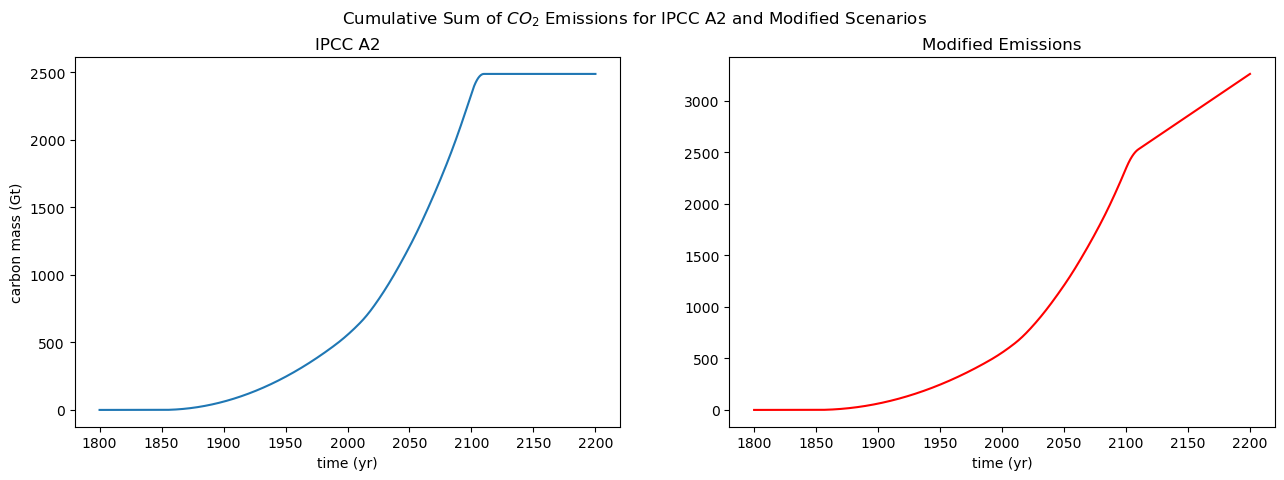

In [21]:
# plot our two cumulative emission scenarios
cumufigs, cumuax = plt.subplots(1,2)
cumuax[0].plot(emission_time, cumulative_emissions_IPCCA2)
cumuax[1].plot(emission_time, cumulative_emissions_modified,color='red')

cumufigs.subplots_adjust(right=2)

cumuax[0].set_title('IPCC A2')
cumuax[1].set_title('Modified Emissions')

cumuax[0].set_ylabel('carbon mass (Gt)')
cumuax[0].set_xlabel('time (yr)'), cumuax[1].set_xlabel('time (yr)')

cumufigs.suptitle(t='Cumulative Sum of $CO_2$ Emissions for IPCC A2 and Modified Scenarios',x=1)

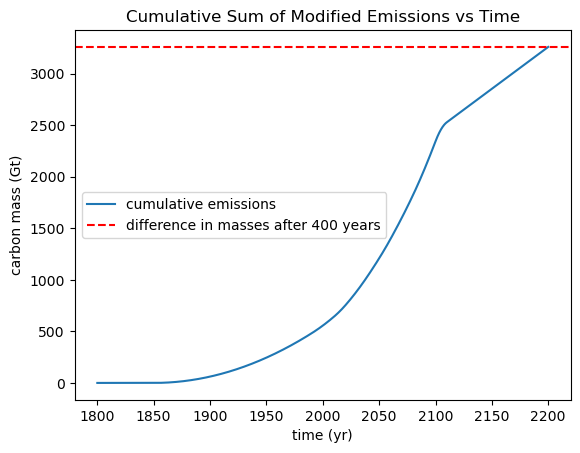

In [22]:
# plot difference of mass sums and
# cumulative modified emissions to see if everything's straight
plt.plot(emission_time, cumulative_emissions_modified)
plt.axhline(y=difference_of_sums,linestyle='dashed',color='red')
plt.legend(['cumulative emissions','difference in masses after 400 years'])
plt.title('Cumulative Sum of Modified Emissions vs Time')
plt.ylabel('carbon mass (Gt)')
plt.xlabel('time (yr)')

plt.show()

In [23]:
# initialize arrays to represent deep ocean mass evolution under IPCCA2 and under modified emission scenarios
# but with 37675 subtracted from their mass values; this way box 4 can properly fit on our plot
deepocean_arr_nine = []
deepocean_arr_modified_nine = []

for i in range(len(masses_nine)):
    deepocean_arr_nine.append(masses_nine[i][3] - 37675) 

for i in range(len(masses_modified_nine)):
    deepocean_arr_modified_nine.append(masses_modified_nine[i][3] - 37675) 

# **1. Evolution of Boxes 1 & 2 Responding to 2012 IPCC's A2 Scenario**

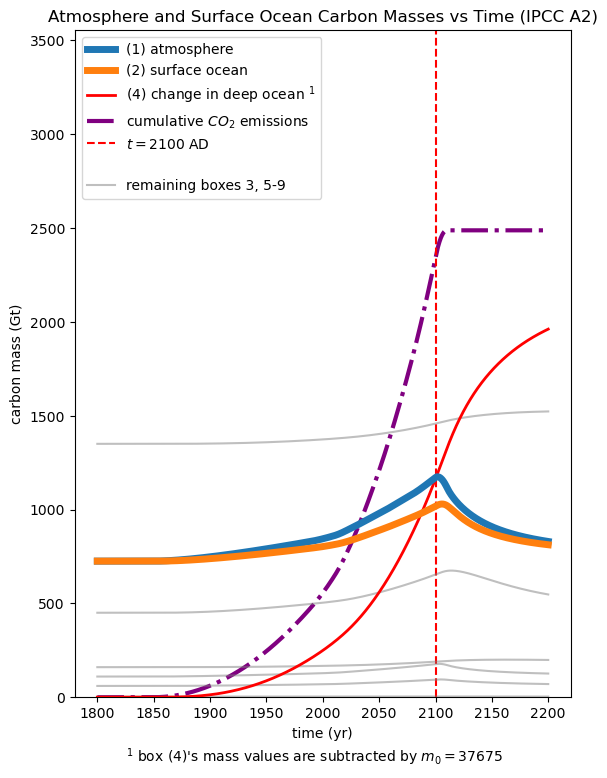

In [24]:
## overlapping of above figures for Q1 (IPCC A2 emissions)
fig_modified, axes_modified = plt.subplots(1,1)

# plot boxes 1 & 2
axes_modified.plot(time_nine, atm_arr_nine, linewidth=5,color='#1f77b4',zorder=12)
axes_modified.plot(time_nine, surfaceocean_arr_nine, linewidth=5,color='#ff7f0e',zorder=15)

# plot box 4 & cumulative emissions
axes_modified.plot(time_nine, deepocean_arr_nine, linewidth=2, color='red',zorder=10)
axes_modified.plot(emission_time, cumulative_emissions_IPCCA2, linestyle='-.', color='purple', linewidth=3)

# plot a line representing the year 2100 after which we stop forcing
axes_modified.axvline(x=2100,color='r',linestyle='--')

# plot rk4 integration of all our boxes and
# define a variable so we can access & modify lines 1 through 9
totalplot = axes_modified.plot(rungekutta_nine[0],rungekutta_nine[1],alpha=0.8)

# change the colour and alpha of the integrated solutions we've just plotted;
# grey and transparent as we don't care for them as much as boxes 1 & 2
for i in range(0,9):
    totalplot[i].set_color('grey')
    totalplot[i].set_alpha(0.5)

# set the transparency of the rk4 first line plotted from rk4 integration as 100%
# since I wanted whitespace in the legend
totalplot[0].set_alpha(0)

# legendary legend
plt.legend(['(1) atmosphere','(2) surface ocean', '(4) change in deep ocean $^1$', 'cumulative $CO_2$ emissions','$t = 2100$ AD','','remaining boxes 3, 5-9'])

# make the plot taller to improve readability
plt.subplots_adjust(top=1.5)

# set y limit to chop off box (4)
axes_modified.set_ylim([0,3555])

# label the plot
axes_modified.set_ylabel('carbon mass (Gt)')
axes_modified.set_xlabel('time (yr)')
plt.title('Atmosphere and Surface Ocean Carbon Masses vs Time (IPCC A2)')
plt.figtext(x=0.5,y=-0.025, s='$^1$ box (4)\'s mass values are subtracted by $m_0 = 37675$',ha='center')

# save the plot
fig_modified.savefig('q1.png', bbox_inches='tight')

# **2. Evolution of Boxes 1 & 2 Responding to our Modified Emissions**

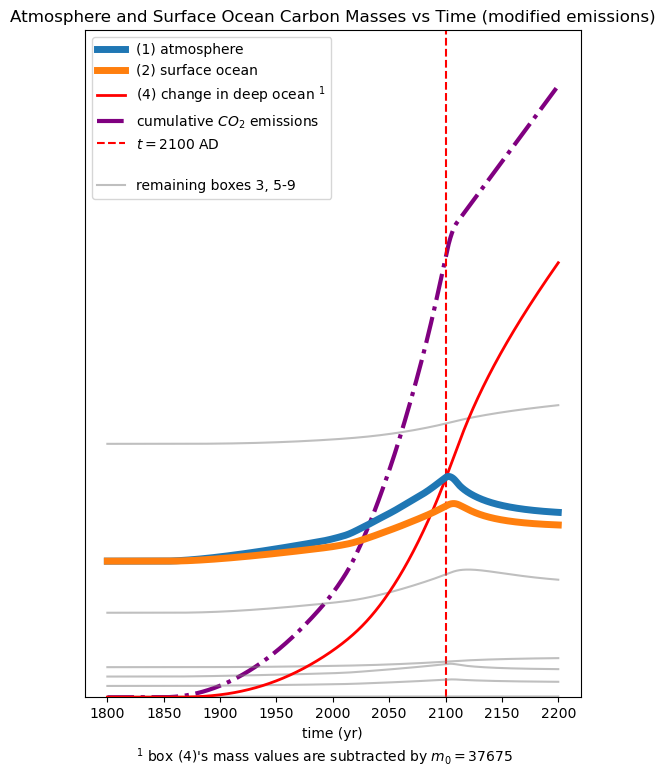

In [25]:
## overlapping of previous figures for Q2 (modified emissions)
fig_modified, axes_modified = plt.subplots(1,1)

# plot boxes 1 & 2
axes_modified.plot(time_modified_nine, atm_arr_modified_nine, linewidth=5,color='#1f77b4',zorder=12)
axes_modified.plot(time_modified_nine, surfaceocean_arr_modified_nine, linewidth=5,color='#ff7f0e',zorder=15)

# plot box 4 & cumulative emissions
axes_modified.plot(time_modified_nine, deepocean_arr_modified_nine, linewidth=2, color='red',zorder=10)
axes_modified.plot(emission_time, cumulative_emissions_modified, linestyle='-.', color='purple', linewidth=3)

# plot a line representing the year 2100 after which we have constant forcing
axes_modified.axvline(x=2100,color='r',linestyle='--')

# set the transparency of the rk4 first line plotted from rk4 integration as 100%
# since I wanted whitespace in the legend
totalplot = axes_modified.plot(rungekutta_modified_nine[0],rungekutta_modified_nine[1],alpha=0.8)

# change the colour and alpha of the integrated solutions we've just plotted;
# grey and transparent as we don't care for them as much as boxes 1 & 2
for i in range(0,9):
    totalplot[i].set_color('grey')
    totalplot[i].set_alpha(0.5)
totalplot[0].set_alpha(0)

# legendary legend
plt.legend(['(1) atmosphere','(2) surface ocean', '(4) change in deep ocean $^1$', 'cumulative $CO_2$ emissions','$t = 2100$ AD','','remaining boxes 3, 5-9'])
plt.subplots_adjust(top=1.5)

# get a snapshot of our figure to plot later...
# to see how huge box 4's mass is!
finalhehe = fig_modified

# label the plot
axes_modified.set_ylim([0,3555])
axes_modified.yaxis.set_visible(False)
axes_modified.set_xlabel('time (yr)')
plt.title('Atmosphere and Surface Ocean Carbon Masses vs Time (modified emissions)')
plt.figtext(x=0.5,y=-0.025, s='$^1$ box (4)\'s mass values are subtracted by $m_0 = 37675$',ha='center')

# save the plot
fig_modified.savefig('q2.png', bbox_inches='tight')

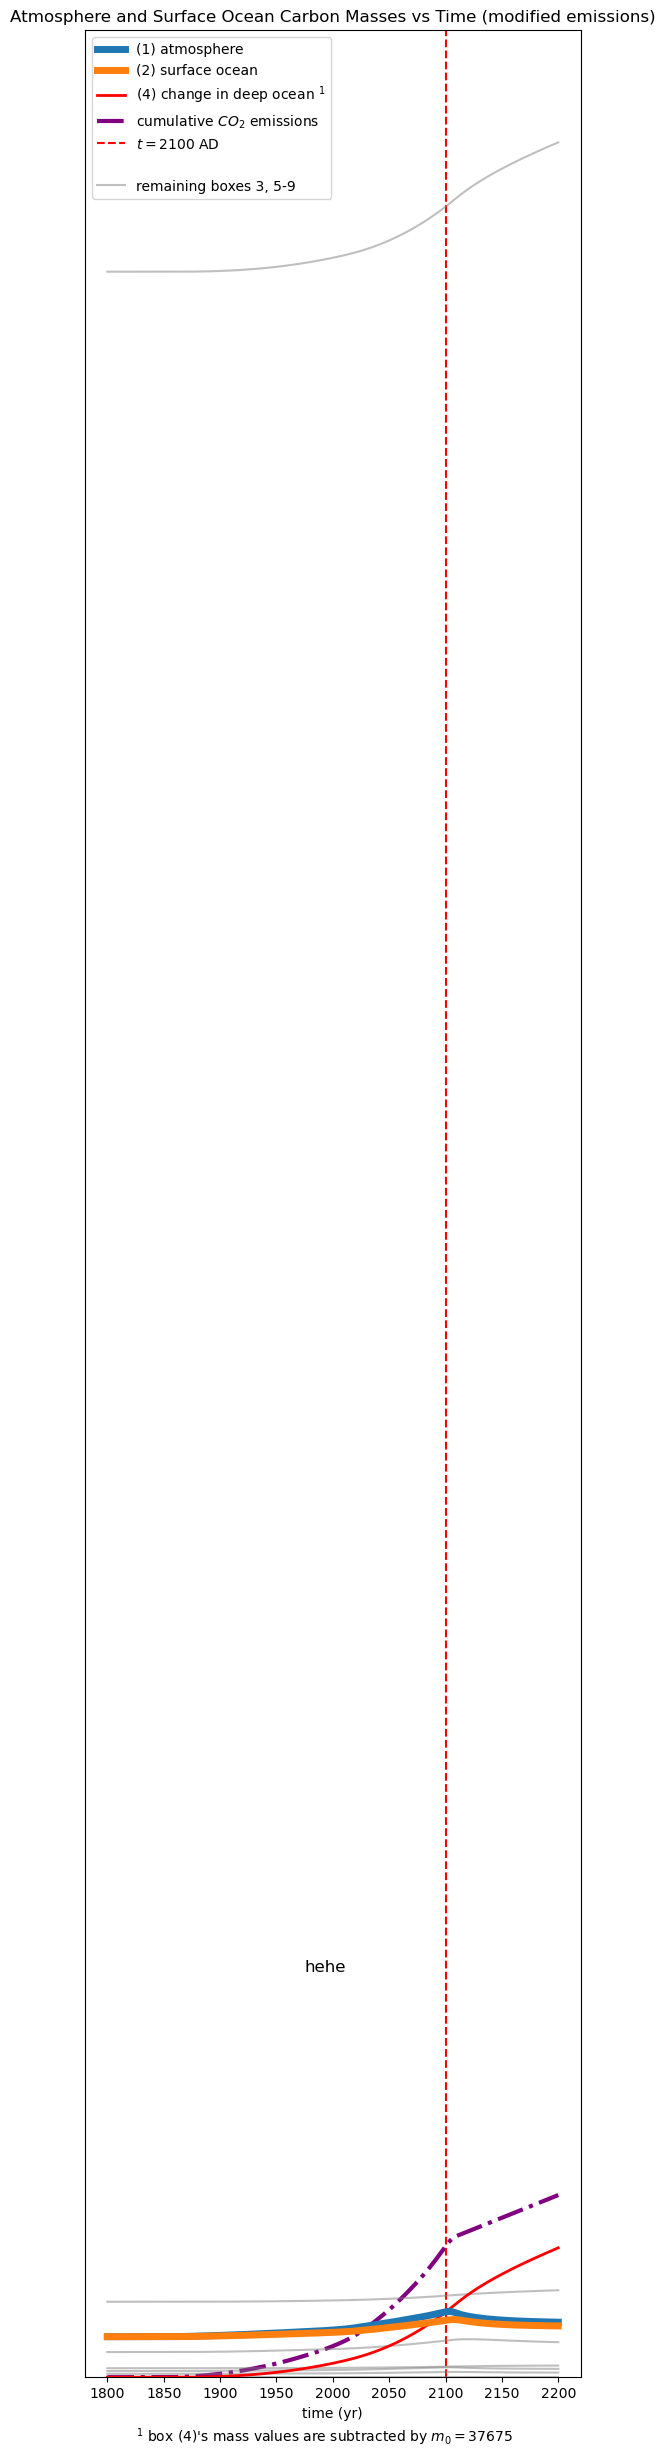

In [26]:
# silly figure
finalhehe.subplots_adjust(top=5)

axes_modified.set_ylim([0,42000])
finalhehe.suptitle('hehe')
finalhehe